In [9]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from pathlib import Path

In [12]:
import matplotlib.pyplot as plt

In [32]:
# file_loc = r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs\final_outputs_rev\Figure_3-mse_sctr.csv'
file_loc = r'/Users/Josh/Documents/GitHub/sabatinilab-glm/sglm/outputs/final_outputs_rev_hps/Figure_1_2-mse_sctr.csv'

concat = pd.read_csv(file_loc)
concat['model_version'] = concat['model_version'].str.replace('max_iter10000__fit_interceptFalse__',  '')
concat['model_version'] = concat['model_version'].str.replace('____',  '.')
concat = concat.set_index(['channel', 'name', 'model_version', 'run_num']).drop('mouse_id', axis=1)

In [33]:
pd.read_csv(file_loc)

,mouse_id,channel,name,model_version,run_num,mse_tr,mse_cv,mse_te
0,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=0,0.823706,0.824196,0.826877
1,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=1,0.825421,0.825777,0.826026
2,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=2,0.824761,0.824677,0.824929
3,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=0,0.773708,0.772376,0.777824
4,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gACH,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=1,0.776346,0.778669,0.775168
...,...,...,...,...,...,...,...,...
139,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=1,0.970156,0.965170,0.979559
140,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=2,0.978865,0.983805,0.970867
141,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=0,0.974789,0.974361,0.974951
142,63_64_65_66_67_68_69_57_58_59_60_61_53_55_56,gDA,base_simple,base_simple_max_iter10000__fit_interceptFalse_...,num=1,0.970156,0.967629,0.979559


In [34]:
concat

mse_tr  \
channel name        model_version                       run_num             
gACH    base_simple base_simple_alpha0.01__l1_ratio0.01 num=0    0.823706   
                                                        num=1    0.825421   
                                                        num=2    0.824761   
                    base_simple_alpha0.01__l1_ratio0.0  num=0    0.773708   
                                                        num=1    0.776346   
...                                                                   ...   
gDA     base_simple base_simple_alpha1.0__l1_ratio0.1   num=1    0.970156   
                                                        num=2    0.978865   
                    base_simple_alpha1.0__l1_ratio1.0   num=0    0.974789   
                                                        num=1    0.970156   
                                                        num=2    0.978865   

                                                                   mse_cv  \
channel name        model_version                       run_num             
gACH    base_simple base_simple_alpha0.01__l1_ratio0.01 num=0    0.824196   
                                                        num=1    0.825777   
                                                        num=2    0.824677   
                    base_simple_alpha0.01__l1_ratio0.0  num=0    0.772376   
                                                        num=1    0.778669   
...                                                                   ...   
gDA     base_simple base_simple_alpha1.0__l1_ratio0.1   num=1    0.965170   
                                                        num=2    0.983805   
                    base_simple_alpha1.0__l1_ratio1.0   num=0    0.974361   
                                                        num=1    0.967629   
                                                        num=2    0.978540   

                                                                   mse_te  
channel name        model_version                       run_num            
gACH    base_simple base_simple_alpha0.01__l1_ratio0.01 num=0    0.826877  
                                                        num=1    0.826026  
                                                        num=2    0.824929  
                    base_simple_alpha0.01__l1_ratio0.0  num=0    0.777824  
                                                        num=1    0.775168  
...                                                                   ...  
gDA     base_simple base_simple_alpha1.0__l1_ratio0.1   num=1    0.979559  
                                                        num=2    0.970867  
                    base_simple_alpha1.0__l1_ratio1.0   num=0    0.974951  
                                                        num=1    0.979559  
                                                        num=2    0.970867  

[144 rows x 3 columns]

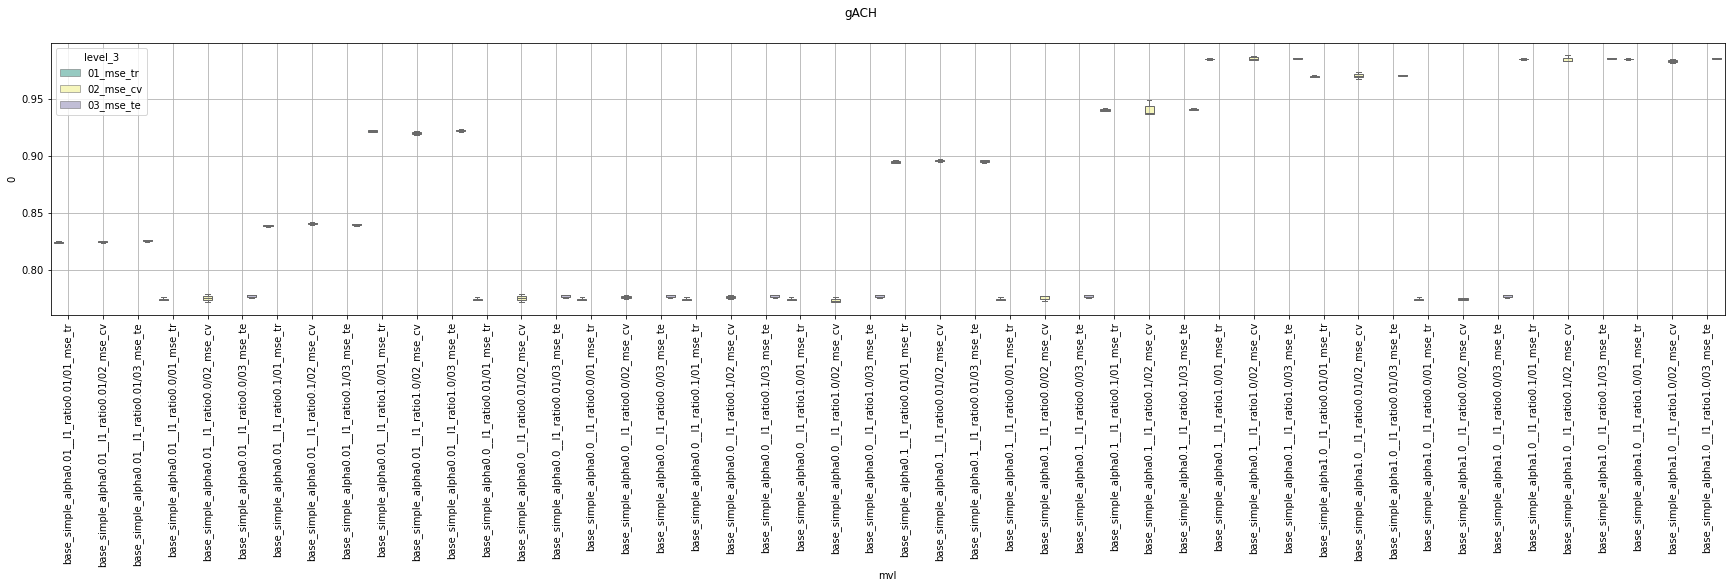

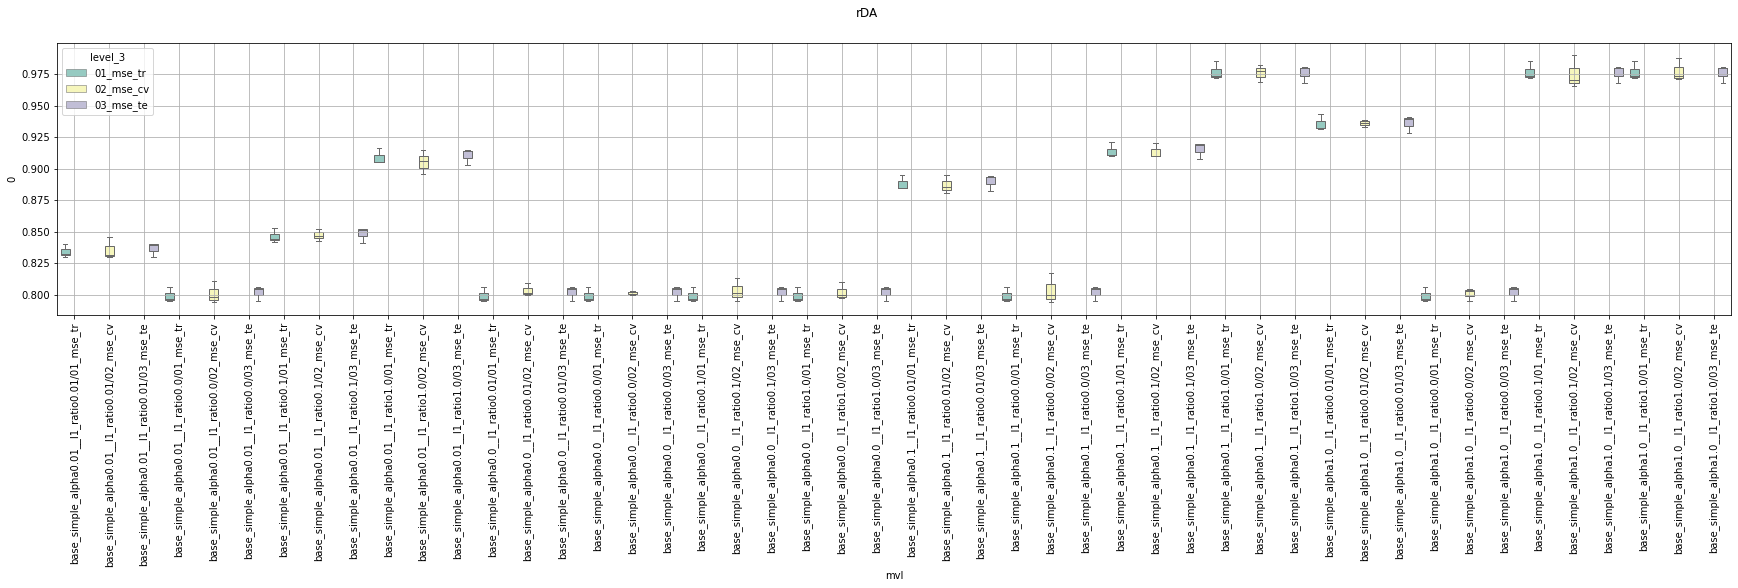

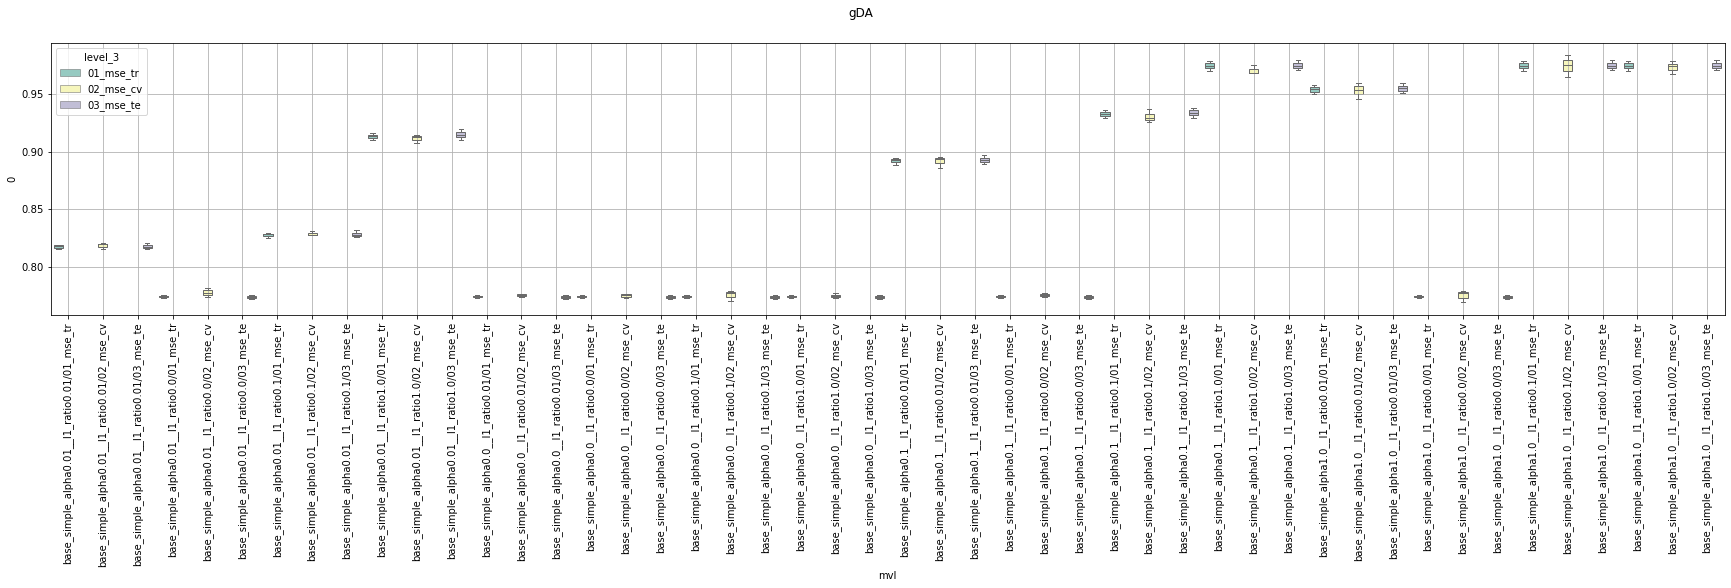

In [45]:
import seaborn as sns
for chl in concat.reset_index()['channel'].unique():
    
    fig, ax = plt.subplots(1,1,figsize=(30,5))
    
    fig.suptitle(chl)
    fig.set_facecolor('w')
    
    vwyc = concat.loc[chl].values
    ymn, ymx = np.min(vwyc), np.max(vwyc)
    
    vbp = concat.loc[chl].rename({'mse_tr':'01_mse_tr', 'mse_cv':'02_mse_cv', 'mse_te':'03_mse_te'}, axis=1).stack().reset_index()
    vbp['mvl'] = vbp['model_version'] + '/' + vbp['level_3']
    
    sns.boxplot(data=vbp, x='mvl', y=0, hue='level_3', palette="Set3", linewidth=1, ax=ax)
    ax.grid(True)
    plt.xticks(rotation=90)